## Binary classification problem

### Dataset :

We study first a binary classification problem, performed by a neural network. Each input has two real features, and the output can be only 0 or 1. The training set contains 4000 examples, and the validation set, 1000.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Display figures on jupyter notebook
%matplotlib inline

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
# Define a function to generate the dataset, in the form of two interlaced spirals
def spiral(phi):
    x = (phi+1)*torch.cos(phi)
    y = phi*torch.sin(phi)
    return torch.cat((x, y), dim=1)

def generate_data(num_data):
    angles = torch.empty((num_data, 1)).uniform_(0, 10)
    data = spiral(angles)
    # add some noise to the data
    data += torch.empty((num_data, 2)).normal_(0.0, 0.3)
    labels = torch.zeros((num_data,), dtype=torch.int)
    # flip half of the points to create two classes
    data[num_data//2:,:] *= -1
    labels[num_data//2:] = 1
    return data, labels

In [7]:
# Generate the training set with 4000 examples by function generate_data

X_train, y_train = generate_data(4000)
X_train.size()

torch.Size([4000, 2])

In [8]:
# Define the vis_data function to visualize the dataset
def vis_data(X, y):
    plt.figure(figsize=(5, 5))
    plt.plot(X[y==1, 0], X[y==1, 1], 'r+') #Examples are represented as red plusses for label 1
    plt.plot(X[y==0, 0], X[y==0, 1], 'b+') #Examples are represented as blue plusses for label 0 

We can now invoke the `vis_data` function on the dataset previously generated to see what it looks like:

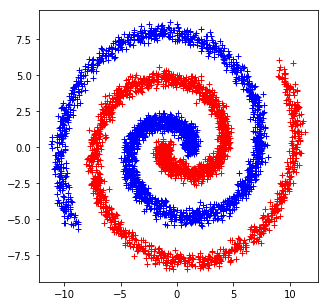

In [9]:
vis_data(X_train, y_train) # visualize training set

We use the `TensorDataset` wrapper from pytorch, so that the framework can easily understand our tensors as a proper dataset.

In [10]:
from torch.utils.data import TensorDataset, DataLoader
training_set = TensorDataset(X_train, y_train)

###  Training the model with a neural network

Here is a skeleton of a neural network with a single layer (thus: a linear classifier). This is the model you'll work on to improve it during this exercise.

Look at the code and run it to see the structure, then follow the questions below to iteratively improve the model.

In [11]:
import torch.nn as nn
import torch.nn.functional as F

At the first step, we define a neural network with just one layer. A useful tutorial for constructing model can be found [here](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py).

In [16]:
# Basic network structure with a single layer
class Model(nn.Module):
    
    def __init__(self, acti):
        super(Model, self).__init__()
        # A single linear layer
        # The model has 2 inputs (the coordinates of the point) and an output (the prediction)
        self.l1 = nn.Linear(2, 1)
        self.activation = acti
        
    def forward(self, inputs):
        # We want the model to predict 0 for one class and 1 for the other class
        # A Sigmoid activation function seems appropriate           
        outputs = self.activation(self.l1(inputs))
        return outputs

#### Same model without last activation function to use BCElogitloss

In [13]:
# Basic network structure with a single layer
class Model_2(nn.Module):
    
    def __init__(self, hidden, acti):
        super(Model_2, self).__init__()
        # A single linear layer
        # The model has 2 inputs (the coordinates of the point) and an output (the prediction)
        self.l1 = nn.Linear(2, hidden)
        self.l2 = nn.Linear(hidden, 1)
        self.activation = acti
        
    def forward(self, inputs):
        # We want the model to predict 0 for one class and 1 for the other class
        # A Sigmoid activation function seems appropriate
        inputs = self.activation(self.l1(inputs))            
        outputs = self.l2(inputs)
        return outputs

In [15]:
# Choose the hyperparameters for training: 
num_epochs = 10
batch_size = 10

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

#### Training the defined model
More information can be found [here](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py).

In [17]:
# define a function for training
def train(num_epochs, batch_size, criterion, optimizer, model, dataset):
    train_error = []
    train_loader = DataLoader(dataset, batch_size, shuffle=True)
    model.train()
    for epoch in range(num_epochs):
        epoch_average_loss = 0.0
        for (X_batch, y_real) in train_loader:
            y_pre = model(X_batch).view(-1)
            loss = criterion(y_pre, y_real.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_average_loss += loss.item() * batch_size / len(dataset)
        train_error.append(epoch_average_loss)
        #print('Epoch [{}/{}], Loss: {:.4f}'
        #              .format(epoch+1, num_epochs, epoch_average_loss))
    return train_error

In [24]:
# Calculate the accuracy on validation set to evaluate the model by the function accuracy
def accuracy(y_real, y_pre):
    y_pre[y_pre<0.5] = 0
    y_pre[y_pre>=0.5] = 1

    acc = 1 - torch.sum(torch.abs(y_pre - y_real))/len(y_pre)
    print('Accuracy of the network on the 1000 validation data: {:.2f} %'.format(acc.item()*100),'\n')
    return(acc.item()*100)

Accuracy of the network on the 1000 validation data: 60.70 % 

Accuracy of the network on the 1000 validation data: 62.10 % 

Accuracy of the network on the 1000 validation data: 61.10 % 

Accuracy of the network on the 1000 validation data: 62.50 % 

Accuracy of the network on the 1000 validation data: 56.70 % 

Accuracy of the network on the 1000 validation data: 53.30 % 

Accuracy of the network on the 1000 validation data: 50.00 % 

Accuracy of the network on the 1000 validation data: 50.00 % 



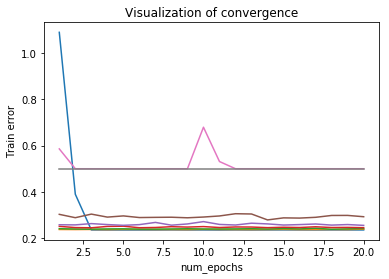

Accuracy of the network on the 1000 validation data: 80.10 % 

Accuracy of the network on the 1000 validation data: 99.90 % 

Accuracy of the network on the 1000 validation data: 98.90 % 

Accuracy of the network on the 1000 validation data: 98.50 % 

Accuracy of the network on the 1000 validation data: 97.00 % 

Accuracy of the network on the 1000 validation data: 77.10 % 

Accuracy of the network on the 1000 validation data: 61.00 % 

Accuracy of the network on the 1000 validation data: 50.60 % 



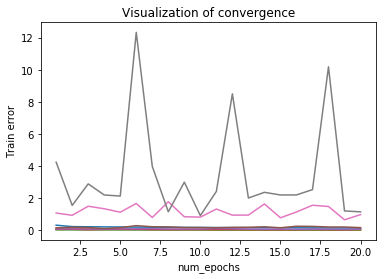

Accuracy of the network on the 1000 validation data: 90.90 % 

Accuracy of the network on the 1000 validation data: 99.50 % 

Accuracy of the network on the 1000 validation data: 99.90 % 

Accuracy of the network on the 1000 validation data: 98.90 % 

Accuracy of the network on the 1000 validation data: 94.90 % 

Accuracy of the network on the 1000 validation data: 61.50 % 

Accuracy of the network on the 1000 validation data: 50.80 % 

Accuracy of the network on the 1000 validation data: 48.40 % 



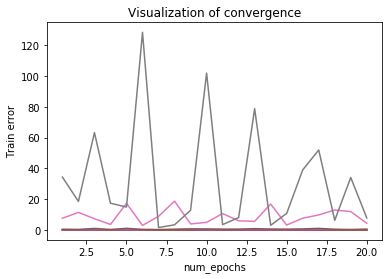

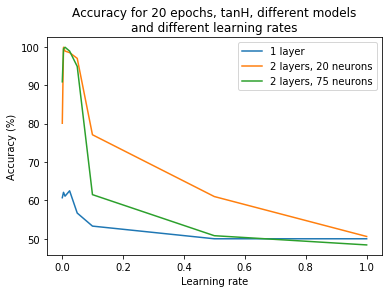

In [25]:
# Choose the hyperparameters for training: 
num_epochs = 20

models_names=['1 layer','2 layers, 20 neurons','2 layers, 75 neurons']
models=[Model(torch.tanh),Model_2(20,torch.tanh),Model_2(75,torch.tanh)]
learning_rates=[0.001,0.005,0.01,0.025,0.05,0.1,0.5,1]

acc=[]

for mod in models:
    acc_opti=[]
    for learning_rate in learning_rates:
        model=mod
        
        criterion = nn.MSELoss()

        # Use SGD optimizer with a learning rate of 0.01
        # It is initialized on our model
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

        train_error = train(num_epochs, batch_size, criterion, optimizer, model, training_set)

        # plot the training error wrt. the number of epochs: 
        plt.plot(range(1, num_epochs+1), train_error,label="LR="+str(learning_rate))
        plt.xlabel("num_epochs")
        plt.ylabel("Train error")
        plt.title("Visualization of convergence")


        # Generate 1000 validation data:
        X_val, y_val = generate_data(1000)

        # predict labels for validation set
        model.eval() # set the model to test mode
        with torch.no_grad():
            y_pre = model(X_val).view(-1)

        acc_opti.append(accuracy(y_val, y_pre))
    plt.show()
    
    acc.append(acc_opti)

# Figure for the accuracy
for i in range(len(acc)):
    plt.plot(learning_rates,acc[i],label=models_names[i])
    
plt.title("Accuracy for 20 epochs, tanH, different models\nand different learning rates")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

Activation function: tanh
Number of neurons: 75
Accuracy of the network on the 1000 validation data: 98.00 %
Activation function: tanh
Number of neurons: 75
Accuracy of the network on the 1000 validation data: 100.00 %
Activation function: tanh
Number of neurons: 75
Accuracy of the network on the 1000 validation data: 100.00 %
Activation function: tanh
Number of neurons: 75
Accuracy of the network on the 1000 validation data: 100.00 %
Activation function: tanh
Number of neurons: 75
Accuracy of the network on the 1000 validation data: 99.90 %
Activation function: tanh
Number of neurons: 75
Accuracy of the network on the 1000 validation data: 99.90 %
Activation function: tanh
Number of neurons: 75
Accuracy of the network on the 1000 validation data: 99.80 %


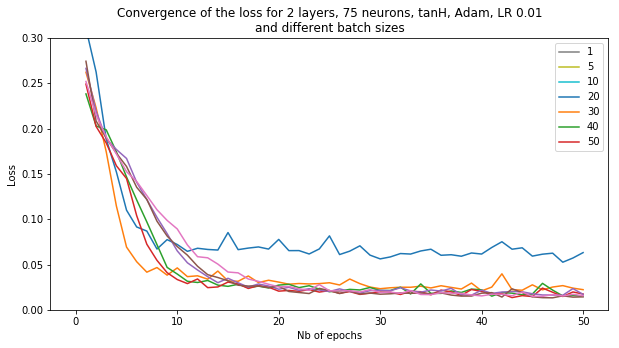

In [65]:
# Choose the hyperparameters for training: 
num_epochs = 50

#Trying for different numbers of output channels
optimizers_names=['Adam']
optimizers=[torch.optim.Adam]
batch_sizes=[1,5,10,20,30,40,50]


plt.figure(figsize=(10,5))
for batch in batch_sizes:
    print("Activation function: tanh")
    print("Number of neurons: 75")

    model=Model_2(75,torch.tanh)

    criterion = nn.MSELoss()

    # Use SGD optimizer with a learning rate of 0.01
    # It is initialized on our model
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    train_error = train(num_epochs, batch, criterion, optimizer, model, training_set)

    # plot the training error wrt. the number of epochs: 
    plt.plot(range(1, num_epochs+1), train_error)



    # Generate 1000 validation data:
    X_val, y_val = generate_data(1000)

    # predict labels for validation set
    model.eval() # set the model to test mode
    with torch.no_grad():
        y_pre = model(X_val).view(-1)

    accuracy(y_val, y_pre)


# Figure for the accuracy
for i in range(len(acc)):
    plt.plot(acc[i],label=batch_sizes[i])
    
plt.title("Convergence of the loss for 2 layers, 75 neurons, tanH, Adam, LR 0.01\nand different batch sizes")
plt.xlabel("Nb of epochs")
plt.ylabel("Loss")
plt.ylim(0,0.30)
plt.legend()
plt.show()

Batch size: 1
Learning rate: 0.001
Accuracy of the network on the 1000 validation data: 84.90 %
Batch size: 1
Learning rate: 0.005
Accuracy of the network on the 1000 validation data: 99.90 %
Batch size: 1
Learning rate: 0.01
Accuracy of the network on the 1000 validation data: 97.60 %
Batch size: 1
Learning rate: 0.025
Accuracy of the network on the 1000 validation data: 98.90 %
Batch size: 1
Learning rate: 0.05
Accuracy of the network on the 1000 validation data: 86.70 %
Batch size: 1
Learning rate: 0.1
Accuracy of the network on the 1000 validation data: 72.90 %


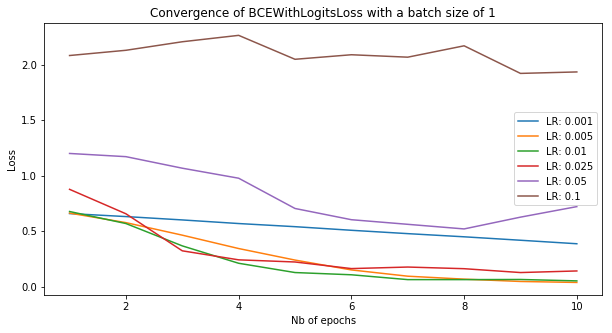

Batch size: 5
Learning rate: 0.001
Accuracy of the network on the 1000 validation data: 69.20 %
Batch size: 5
Learning rate: 0.005
Accuracy of the network on the 1000 validation data: 99.50 %
Batch size: 5
Learning rate: 0.01
Accuracy of the network on the 1000 validation data: 99.30 %
Batch size: 5
Learning rate: 0.025
Accuracy of the network on the 1000 validation data: 99.90 %
Batch size: 5
Learning rate: 0.05
Accuracy of the network on the 1000 validation data: 99.90 %
Batch size: 5
Learning rate: 0.1
Accuracy of the network on the 1000 validation data: 81.40 %


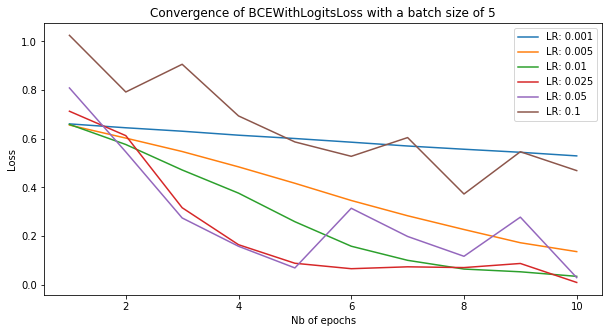

Batch size: 10
Learning rate: 0.001
Accuracy of the network on the 1000 validation data: 64.40 %
Batch size: 10
Learning rate: 0.005
Accuracy of the network on the 1000 validation data: 95.90 %
Batch size: 10
Learning rate: 0.01
Accuracy of the network on the 1000 validation data: 99.90 %
Batch size: 10
Learning rate: 0.025
Accuracy of the network on the 1000 validation data: 100.00 %
Batch size: 10
Learning rate: 0.05
Accuracy of the network on the 1000 validation data: 92.50 %
Batch size: 10
Learning rate: 0.1
Accuracy of the network on the 1000 validation data: 91.30 %


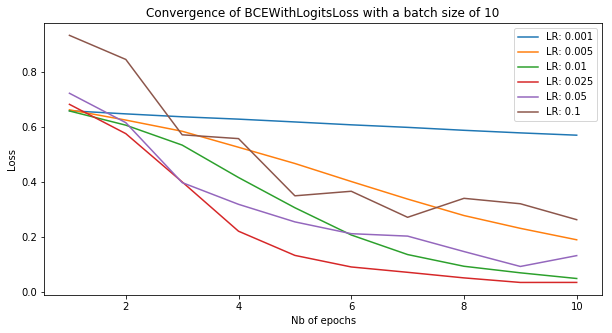

Batch size: 20
Learning rate: 0.001
Accuracy of the network on the 1000 validation data: 67.80 %
Batch size: 20
Learning rate: 0.005
Accuracy of the network on the 1000 validation data: 82.50 %
Batch size: 20
Learning rate: 0.01
Accuracy of the network on the 1000 validation data: 98.20 %
Batch size: 20
Learning rate: 0.025
Accuracy of the network on the 1000 validation data: 99.10 %
Batch size: 20
Learning rate: 0.05
Accuracy of the network on the 1000 validation data: 99.80 %
Batch size: 20
Learning rate: 0.1
Accuracy of the network on the 1000 validation data: 99.90 %


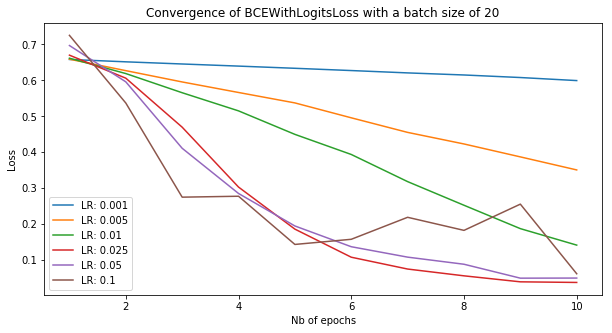

Batch size: 30
Learning rate: 0.001
Accuracy of the network on the 1000 validation data: 62.50 %
Batch size: 30
Learning rate: 0.005
Accuracy of the network on the 1000 validation data: 80.60 %
Batch size: 30
Learning rate: 0.01
Accuracy of the network on the 1000 validation data: 97.40 %
Batch size: 30
Learning rate: 0.025
Accuracy of the network on the 1000 validation data: 99.60 %
Batch size: 30
Learning rate: 0.05
Accuracy of the network on the 1000 validation data: 99.50 %
Batch size: 30
Learning rate: 0.1
Accuracy of the network on the 1000 validation data: 95.70 %


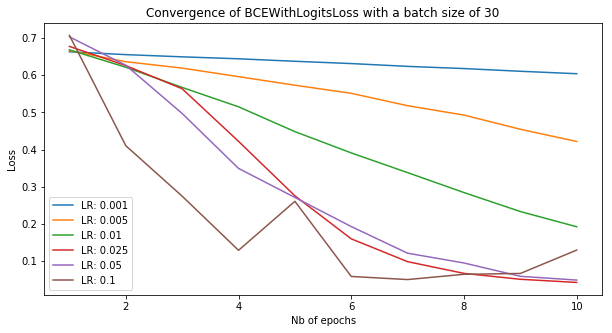

Batch size: 40
Learning rate: 0.001
Accuracy of the network on the 1000 validation data: 64.00 %
Batch size: 40
Learning rate: 0.005
Accuracy of the network on the 1000 validation data: 77.60 %
Batch size: 40
Learning rate: 0.01
Accuracy of the network on the 1000 validation data: 91.10 %
Batch size: 40
Learning rate: 0.025
Accuracy of the network on the 1000 validation data: 99.70 %
Batch size: 40
Learning rate: 0.05
Accuracy of the network on the 1000 validation data: 100.00 %
Batch size: 40
Learning rate: 0.1
Accuracy of the network on the 1000 validation data: 96.90 %


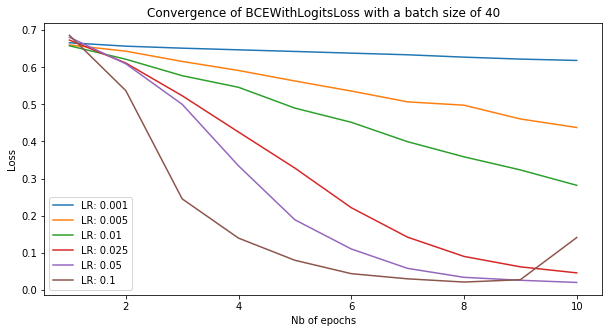

Batch size: 50
Learning rate: 0.001
Accuracy of the network on the 1000 validation data: 60.50 %
Batch size: 50
Learning rate: 0.005
Accuracy of the network on the 1000 validation data: 79.60 %
Batch size: 50
Learning rate: 0.01
Accuracy of the network on the 1000 validation data: 86.60 %
Batch size: 50
Learning rate: 0.025
Accuracy of the network on the 1000 validation data: 99.60 %
Batch size: 50
Learning rate: 0.05
Accuracy of the network on the 1000 validation data: 99.70 %
Batch size: 50
Learning rate: 0.1
Accuracy of the network on the 1000 validation data: 98.20 %


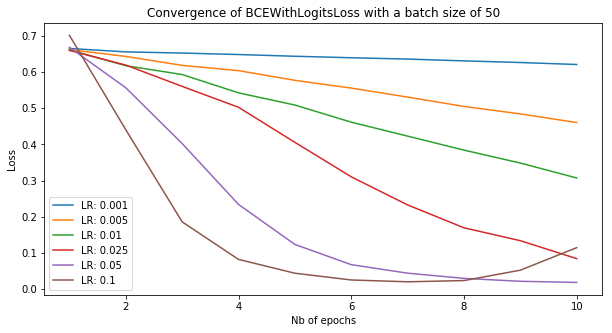

In [72]:
num_epochs=10

#Trying for different learning rates and batch size with the new loss
learning_rates=[0.001,0.005,0.01,0.025,0.05,0.1]

acc=[]
batch_sizes=[1,5,10,20,30,40,50]

for batch in batch_sizes:

    plt.figure(figsize=(10,5))
    for learning_rate in learning_rates:

        print("Batch size:",batch)
        print("Learning rate:",learning_rate)
        
        model=Model_2(75,torch.tanh)

        criterion = nn.BCEWithLogitsLoss()

        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

        train_error = train(num_epochs, batch, criterion, optimizer, model, training_set)

        # plot the training error wrt. the number of epochs: 
        plt.plot(range(1, num_epochs+1), train_error,label="LR: "+str(learning_rate))
        plt.xlabel("Nb of epochs")
        plt.ylabel("Loss")
        plt.title("Convergence of BCEWithLogitsLoss with a batch size of "+str(batch))


        # Generate 1000 validation data:
        X_val, y_val = generate_data(1000)

        # predict labels for validation set
        model.eval() # set the model to test mode
        with torch.no_grad():
            y_pre = model(X_val).view(-1)
            
        accuracy(y_val, y_pre)   

    plt.legend()
    plt.show()
    

#### Evaluate the model on the validation set

In [13]:
# Generate 1000 validation data:
X_val, y_val = generate_data(1000)

# predict labels for validation set
model.eval() # set the model to test mode
with torch.no_grad():
    y_pre = model(X_val).view(-1)

In [14]:
# predict labels for validation set
model.eval() # set the model to test mode
with torch.no_grad():
    y_pre = model(X_val).view(-1)

In [16]:
accuracy(y_val, y_pre)

Accuracy of the network on the 1000 validation data: 59.40 %


In [67]:
# Compare the prediction with real labels

def compare_pred(X, y_real, y_pre):
    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    plt.plot(X[y_real==1, 0], X[y_real==1, 1], 'r+') #Examples are represented as a red plusses for label 1
    plt.plot(X[y_real==0, 0], X[y_real==0, 1], 'b+') #Examples are represented as a blue plusses for label 0
    plt.title("real data")

    plt.subplot(122)
    plt.plot(X[y_pre==1, 0], X[y_pre==1, 1], 'r+')
    plt.plot(X[y_pre==0, 0], X[y_pre==0, 1], 'b+')
    plt.title("prediciton results")

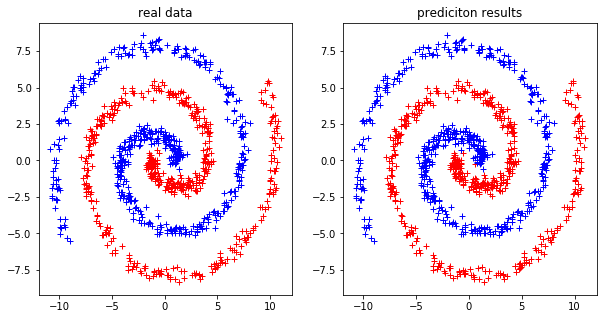

In [68]:
compare_pred(X_val, y_val, y_pre)

### Exercise 1: Impact of the architecture of the model

The class `Model` is the definition of your model. You can now modify it to try out different architectures and
see the impact of the following factors:

* Try to add more layers (1, 2, 3, more ?)
* Try to different activation functions ([sigmoid](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.sigmoid), [tanh](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.tanh), [relu](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.relu), etc.)
* Try to change the number of neurons for each layer (5, 10, 20, more ?)

### Exercise 2: Impact of the optimizer

Retrain the model by using different parameters of the optimizer, you can change its parameter in the cell initializing it, after the definition of your model.

* Use different batch size from 10 to 400
* Try different values of the learning rate (between 0.001 and 10), and see how these impact the trainig process. Do all network architectures react the same way to different learning rates?
* Change the duration of the training by increasing the number of epochs
* Try other optimizers, such as [Adam](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam) or [RMSprop](https://pytorch.org/docs/stable/optim.html?highlight=rmsprop#torch.optim.RMSprop)

**Note:** These changes may interact with your previous choices of architectures, and you may need to change them as well!

### Exercise 3: Impact of the loss function

The current model uses a mean square error (MSE) loss. While this loss can be used in this case, it is now rarely used for classification, and instead a Binary Cross Entropy (BCE) is used. It consists in interpreting the output of the network as the probability $p(y | x)$ of the point $x$ to belong to the class $y$, and in maximizing the probability to be correct for all samples $x$, that is, in maximizing $\displaystyle \prod_{(x,y) \in Dataset} p(y|x)$. Applying $-\log$ to this quantity, we obtain the following criterion to minimize:

$$ \sum_{(x,y) \in Dataset} - \log p(y | x) $$

This is implemented as such by the [BCELoss](https://pytorch.org/docs/stable/nn.html?highlight=bce#torch.nn.BCELoss) of pytorch. Note that this criterion requires its input to be a probability, i.e. in $[0,1]$, which requires the use of an appropriate activation function beforehand, e.g., a sigmoid.

It turns out that, for numerical stability reasons, it is better to incorporate this sigmoid and the BCELoss into a single function; this is done by the [BCEWithLogitsLoss](https://pytorch.org/docs/stable/nn.html?highlight=bcewithlogit#torch.nn.BCEWithLogitsLoss). Try to replace the MSE by this one and see how this changes the behavior in the network. This can also interact with the changes of the two previous exercices.

**Note:** As a consequence, when using the BCEWithLogitsLoss, the last layer of your network should not be followed by an activation function, as BCEWithLogitsLoss already adds a sigmoid.

### Exercise 4: Prediction on test set

Once you have a model that seems satisfying on the validation dataset, you SHOULD evaluate it on a test dataset that has never been used before, to obtain a final accuracy value.

In [82]:
# Here is a test dataset. Use it similarly to the validaiton dataset above
# to compute the final performance of your model
X_test, y_test = generate_data(500)

Accuracy of the network on the 1000 validation data: 100.00 % 



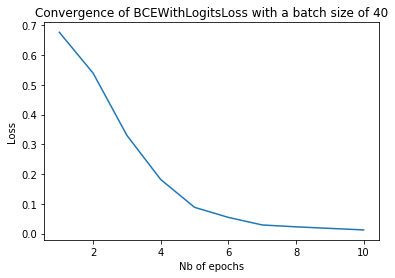

In [83]:
num_epochs=10

model=Model_2(75,torch.tanh)

criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

train_error = train(num_epochs, 40, criterion, optimizer, model, training_set)

# plot the training error wrt. the number of epochs: 
plt.plot(range(1, num_epochs+1), train_error,label="LR: "+str(learning_rate))
plt.xlabel("Nb of epochs")
plt.ylabel("Loss")
plt.title("Convergence of BCEWithLogitsLoss with a batch size of "+str(40))


# predict labels for validation set
model.eval() # set the model to test mode
with torch.no_grad():
    y_pre = model(X_test).view(-1)

accuracy(y_test, y_pre)